In [ ]:
#pip install pingouin

In [112]:
#pip install factor_analyzer


     ---------------------------------------- 0.0/42.5 kB ? eta -:--:--
     ---------------------------------------- 42.5/42.5 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/203.7 kB ? eta -:--:--
   ---------------------- ----------------- 112.6/203.7 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 203.7/203.7 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/98.9 kB ? eta -:--:--
   ---------------------------------------- 98.9/98.9 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.8 MB 6.3 MB/s eta 0

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import collections

from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC

from pingouin import multivariate_normality
from factor_analyzer import FactorAnalyzer

#other libraries
import math
from collections import Counter

In [10]:
palette_features = ['#E68753', '#409996']

# Data Preprocessing

In [2]:
data = pd.read_csv('waterQuality1.csv')
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [3]:
print(data.shape)
print(data.columns)

(7999, 21)
Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [6]:
# checking missing value
missing_value = ['#NUM!', np.nan]
data =pd.read_csv('waterQuality1.csv', na_values = missing_value)
data.isnull().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

In [7]:
# remove missing value
data.dropna( subset=['ammonia', 'is_safe'], axis=0, inplace=True)
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [8]:
#convert both columns to numeric data type
data['ammonia'] = pd.to_numeric(data['ammonia'])
data['is_safe'] = pd.to_numeric(data['is_safe'])

In [9]:
#statistic metrics for continuous variables without scientific notation
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [61]:
data.columns


Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

# Assumption Checking

Bartlett Test Hypothesis

H<sub>0 = Variance among group is equal

H<sub>1 = At least 1 group has a variance that is not equal

In [62]:
# bartlett test for homogenity
st.bartlett(data['aluminium'],data['ammonia'], data['arsenic'], data['barium'],data['cadmium'],data['chloramine'],
            data['chromium'], data['copper'], data['flouride'], data['bacteria'], data['viruses'], data['lead'],
            data['nitrates'], data['nitrites'], data['mercury'], data['perchlorate'], data['radium'], data['selenium'],
            data['silver'], data['uranium'],data['is_safe'])

BartlettResult(statistic=827447.8902262661, pvalue=0.0)

Multivariate Normality Hypothesis

H<sub>0 = Variables follow multivariate normal dist

H<sub>1 = Variables doesn't follow multivariate normal dist

In [66]:
# multivariate normality test
multivariate_normality(data, alpha = 0.05)

HZResults(hz=1.329326759171939, pval=0.0, normal=False)

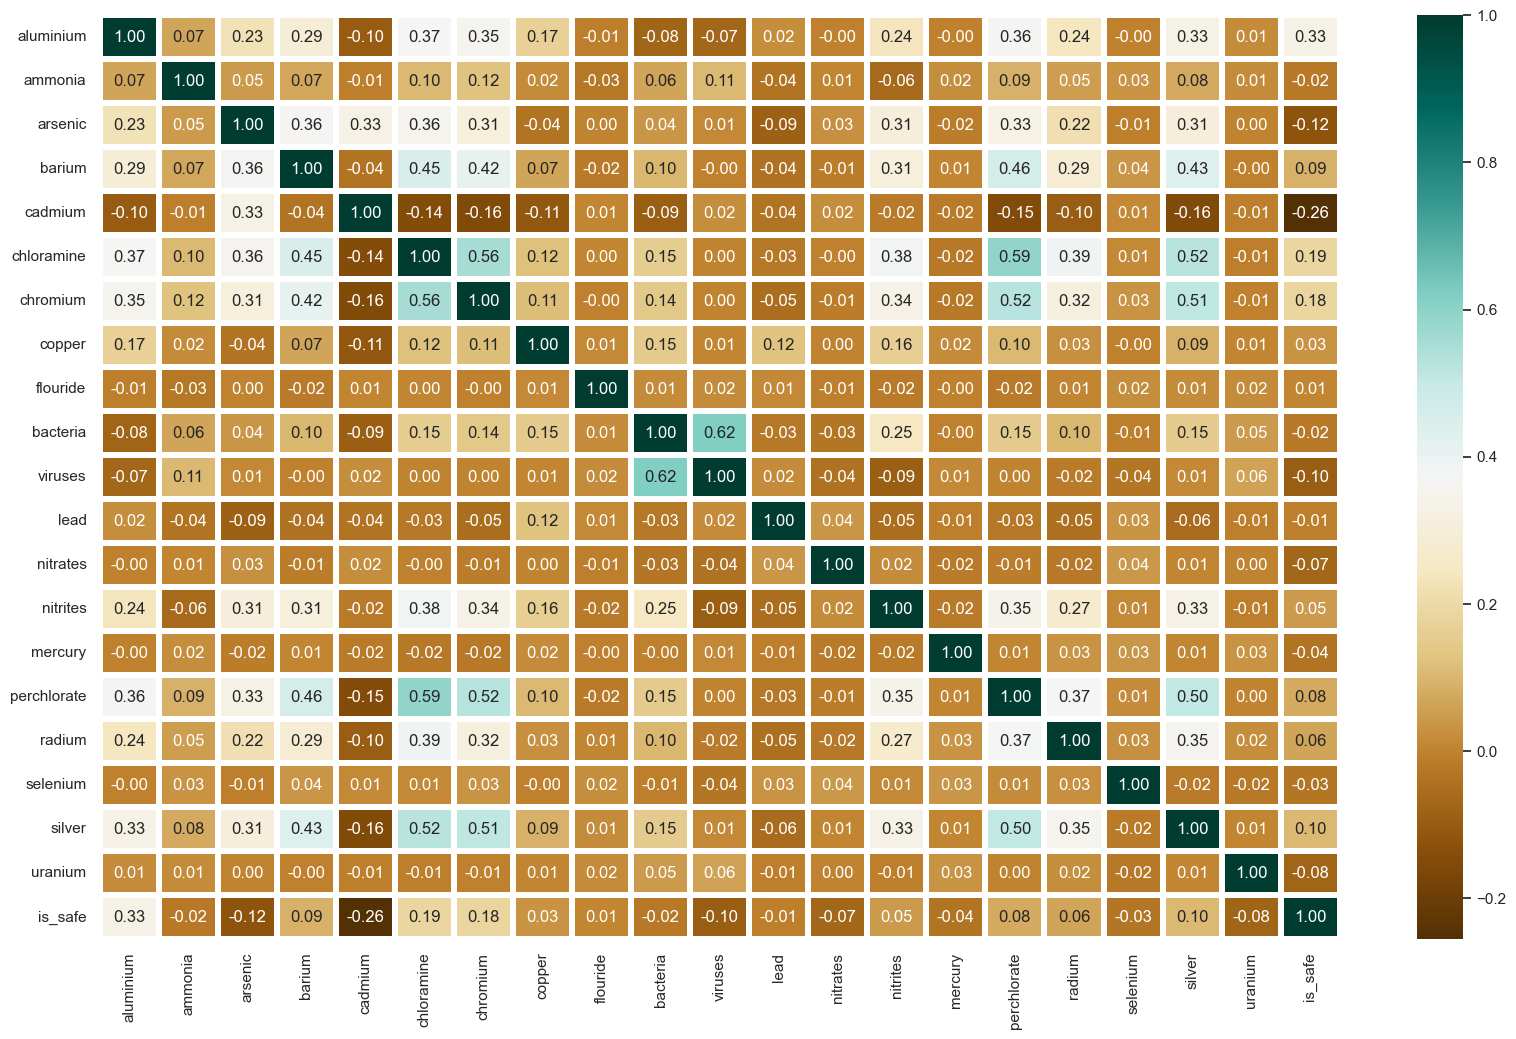

In [92]:
# plotting correlation matrix to notice relationships or lack of it between variables
corr = data.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

In [137]:
# KMO Test
def kmo(dataset_corr):
    #KMO Test
    #inverse of the correlation matrix
    corr_inv = np.linalg.inv(dataset_corr)
    nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
    
    #partial correlation matrix
    A = np.ones((nrow_inv_corr,ncol_inv_corr))
    for i in range(0,nrow_inv_corr,1):
        for j in range(i,ncol_inv_corr,1):
            #above the diagonal
            A[i,j] = - (corr_inv[i,j]) / (math.sqrt(corr_inv[i,i] * corr_inv[j,j]))
            #below the diagonal
            A[j,i] = A[i,j]
    
    #transform to an array of arrays ("matrix" with Python)
    dataset_corr = np.asarray(dataset_corr)
        
    #KMO value
    kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(dataset_corr)))
    kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
    kmo_value = kmo_num / kmo_denom
    
    
    kmo_j = [None]*dataset_corr.shape[1]
    #KMO per variable (diagonal of the spss anti-image matrix)
    for j in range(0, dataset_corr.shape[1]):
        kmo_j_num = np.sum(dataset_corr[:,[j]] ** 2) - dataset_corr[j,j] ** 2
        kmo_j_denom = kmo_j_num + np.sum(A[:,[j]] ** 2) - A[j,j] ** 2
        kmo_j[j] = kmo_j_num / kmo_j_denom

    
    Result = collections.namedtuple("KMO_Test_Results", ["value", "per_variable"])   
    
    #Output of the results - named tuple    
    return Result(value=kmo_value,per_variable=kmo_j)

In [138]:
kmo = kmo(corr)


In [139]:
kmo[1]

[0.7874031700960358,
 0.6725120013318479,
 0.7530293467353725,
 0.9298841425874362,
 0.5784076133315912,
 0.8989530130155652,
 0.9129570214346744,
 0.6152398826525564,
 0.40569315503162856,
 0.4781034157013928,
 0.42570968365111633,
 0.5769307132789229,
 0.534131158488511,
 0.7688550515834629,
 0.4663760086509502,
 0.8979003457910057,
 0.9318131766018201,
 0.4138686765725664,
 0.9177861780903093,
 0.5112550456346662,
 0.585463275684964]

In [141]:
np.reshape(kmo[1], (7,3))

array([[0.78740317, 0.672512  , 0.75302935],
       [0.92988414, 0.57840761, 0.89895301],
       [0.91295702, 0.61523988, 0.40569316],
       [0.47810342, 0.42570968, 0.57693071],
       [0.53413116, 0.76885505, 0.46637601],
       [0.89790035, 0.93181318, 0.41386868],
       [0.91778618, 0.51125505, 0.58546328]])

In [104]:
data.copy()
data = data.drop(['flouride','bacteria','viruses','mercury','selenium'], axis = 1)
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,lead,nitrates,nitrites,perchlorate,radium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.054,16.08,1.13,37.75,6.78,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.100,2.01,1.93,32.26,3.21,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.078,14.16,1.11,50.28,7.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,0.016,1.41,1.29,9.12,1.72,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.117,6.74,1.11,16.90,2.41,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,0.197,14.29,1.00,3.57,2.13,0.06,0.03,1.0
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,0.031,10.27,1.00,1.48,1.11,0.10,0.08,1.0
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.182,15.92,1.00,1.35,4.84,0.04,0.05,1.0
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.000,0.00,0.00,0.00,0.00,0.00,0.00,1.0


# PCA & FA

## Balancing Response Variable

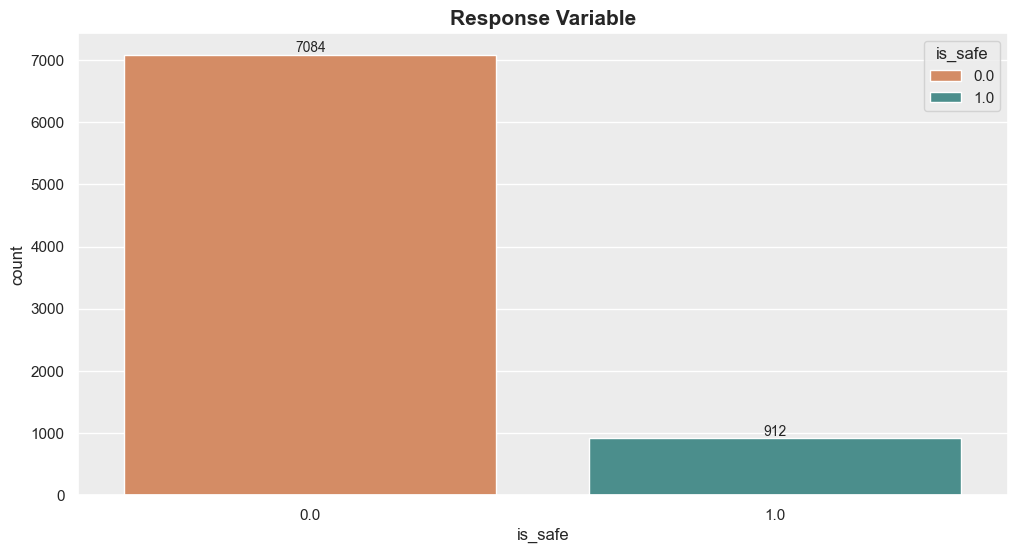

In [134]:
#plot target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Response Variable", fontsize=15, fontweight='bold', fontname='Arial', ha='center')
ax = sns.countplot(x='is_safe', data=data,hue='is_safe', palette=palette_features)

#add labels to each bar
abs_values = data['is_safe'].value_counts(ascending=False).values
for i, v in enumerate(abs_values):
    if v is not None:
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

#show the plot
plt.show()

In [109]:
#balance the target variable
columns = data.columns
columns = [c for c in columns if c not in ['is_safe']]
y = data['is_safe'] #prior target variable
X = data[columns]  #prior features

ros = RandomOverSampler(sampling_strategy='minority')
X, y = ros.fit_resample(X, y) #y_train as balanced target variable
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y)}\n")
print(X.shape[0] - data.shape[0], 'new random picked points')

Imbalanced target class: 0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
14163    1.0
14164    1.0
14165    1.0
14166    1.0
14167    1.0
Name: is_safe, Length: 14168, dtype: float64

Balanced target class: Counter({1.0: 7084, 0.0: 7084})

6172 new random picked points


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

C:\Users\darre\AppData\Local\Temp\ipykernel_19528\1712531360.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, data=data, palette=palette_features)


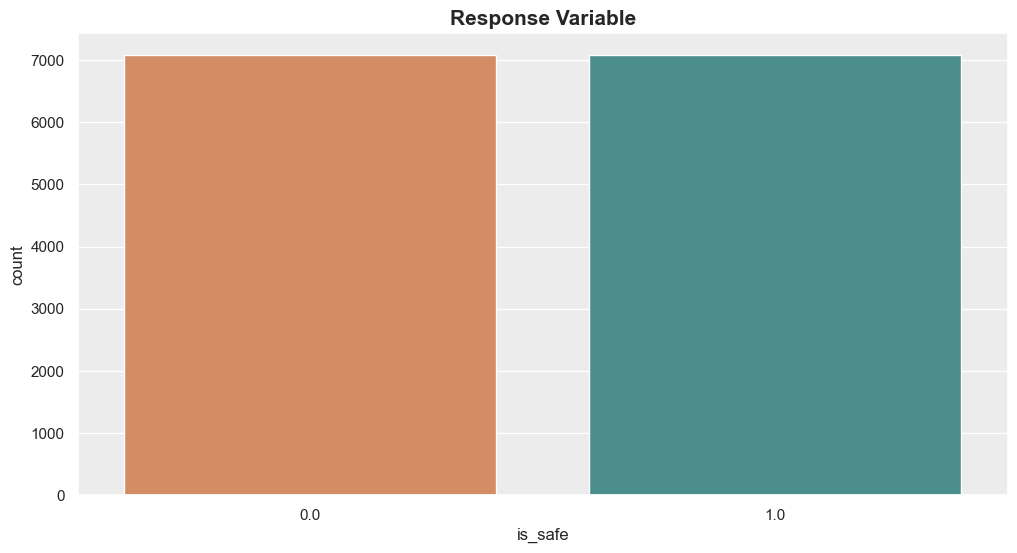

In [133]:
#plot the balanced target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Response Variable", fontsize=15, fontweight='bold', fontname='Arial', ha='center')
ax = sns.countplot(x=y, data=data, palette=palette_features)
plt.show()


## Determine Number of Components

In [144]:
# standardized the X variable
sc = StandardScaler()
X_std = sc.fit_transform(X)

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_

In [119]:
fa = FactorAnalyzer()
fa.set_params(n_factors = 16, rotation = None)
fa.fit(X_std)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.51942973, 1.69589176, 1.13088084, 1.02910948, 1.00388945,
       0.9425932 , 0.86540629, 0.77525217, 0.70696263, 0.67458414,
       0.62935166, 0.59616887, 0.53785154, 0.52164639, 0.37098187])

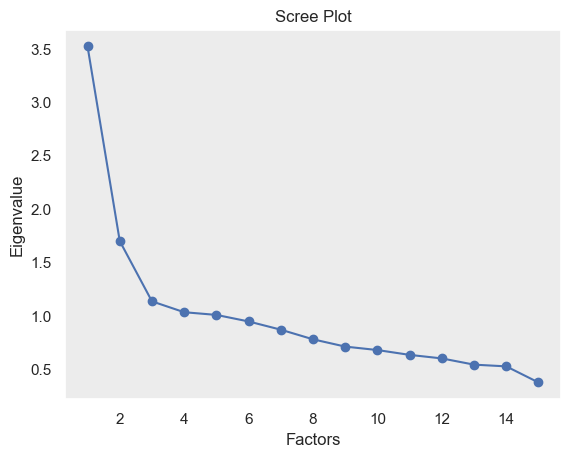

In [120]:
# Create scree plot using matplotlib
plt.scatter(range(1,X_std.shape[1]+1),ev)
plt.plot(range(1,X_std.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [121]:
# variance explained
var_explained=[]
for i in ev:
    var_explained.append((i/sum(ev))*100)
print(var_explained)

[23.462864847374316, 11.305945073893183, 7.539205569446941, 6.8607298469914, 6.6925963209828545, 6.283954640851748, 5.769375252966783, 5.168347782826976, 4.713084189428504, 4.4972275939568345, 4.19567773841965, 3.9744591386706123, 3.585676917779886, 3.477642629588683, 2.4732124568216323]


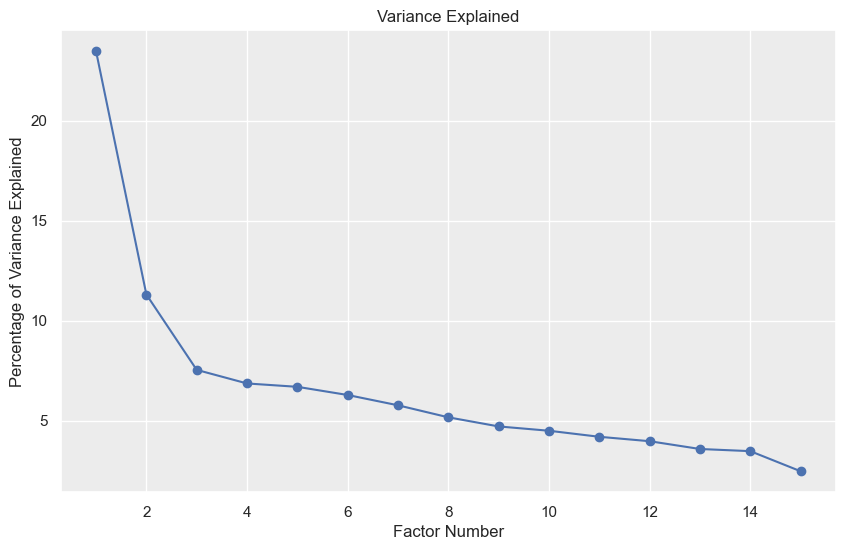

In [125]:
# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var_explained) + 1), var_explained, marker='o')
plt.title('Variance Explained')
plt.xlabel('Factor Number')
plt.ylabel('Percentage of Variance Explained')
plt.grid(True)
plt.show()

In [ ]:
# cov_matrix = np.cov(X_std.T)
# eigen_val,eigen_vec=np.linalg.eig(cov_matrix)
# print("Eigen Value :\n",eigen_val)
# print("Eigen Vector :\n",eigen_vec)

In [ ]:
# # variance explained
# var_explained=[]
# for i in eigen_val:
#     var_explained.append((i/sum(eigen_val))*100)
# print(var_explained)

## Build PCA

In [122]:
pca=decomposition.PCA(n_components=5)

#persamaan PC baru
X_std_pca=pca.fit_transform(X_std)
X_std_pca

array([[ 1.76352305e+00, -1.08715992e-01, -6.55272265e-01,
        -4.63479370e-01,  4.25123491e-01],
       [ 2.48525620e+00, -5.56754783e-01, -1.15436210e+00,
        -1.81908227e-01, -5.32463759e-01],
       [ 1.73541382e+00, -1.98200375e-01, -7.61078394e-01,
        -5.97509723e-01,  4.98654073e-02],
       ...,
       [-1.49086312e-01, -6.45704218e-01,  1.03090730e-03,
         9.61283960e-01, -1.30317670e+00],
       [ 3.58076833e+00, -1.22235102e+00,  2.43338687e-01,
        -1.21702127e+00, -8.40851878e-01],
       [ 1.57878763e+00, -2.19691373e+00, -2.96893992e-01,
         3.11034906e-01,  3.71423576e-01]])

# Train Test Split

In [127]:
#preparation of train and test data for K-NN
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X_std_pca, y, test_size=0.2, random_state=1) #80 % of train data, 20 % of test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11334, 5), (2834, 5), (11334,), (2834,))

# KNN

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[[1075  315]
 [  16 1428]]


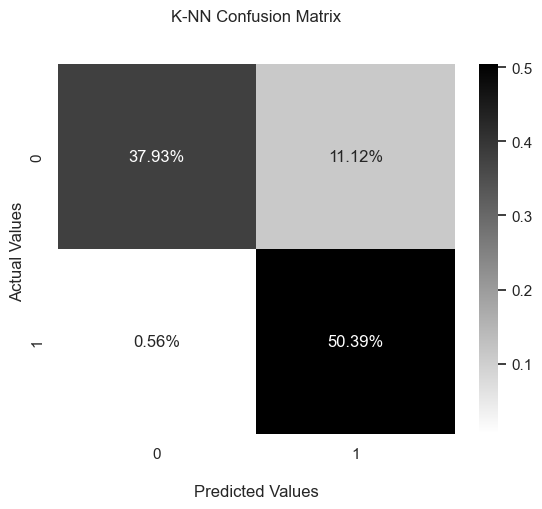

In [128]:
#implement K-NN algorithm
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)
y_pred_knnc = knnc.predict(X_test)

#plotting Confusion Matrix
cf_matrix_knnc = confusion_matrix(y_test, y_pred_knnc)
print(cf_matrix_knnc)

ax = sns.heatmap(cf_matrix_knnc/np.sum(cf_matrix_knnc), annot=True, fmt='.2%', cmap='binary')
ax.set_title('K-NN Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [129]:
#evaluation of K-NN: metrics pivot chart
print(classification_report(y_test, y_pred_knnc))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_knnc),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_knnc),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_knnc),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_knnc),3)))
print('AUC Score : ' + str(round(metrics.roc_auc_score(y_test, y_pred_knnc),3)))

              precision    recall  f1-score   support

         0.0       0.99      0.77      0.87      1390
         1.0       0.82      0.99      0.90      1444

    accuracy                           0.88      2834
   macro avg       0.90      0.88      0.88      2834
weighted avg       0.90      0.88      0.88      2834

Accuracy Score : 0.883
Precision Score : 0.819
Recall Score : 0.989
F-Score : 0.896
AUC Score : 0.881


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

## hyperparameter tuning

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Best Score:0.9362098118326141
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1}
[[1234  156]
 [   3 1441]]


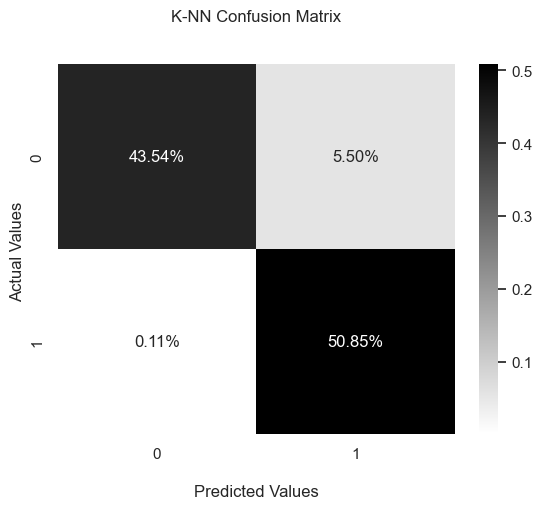

In [130]:
#hyperparameter tuning
param_grid = {'n_neighbors':np.arange(1,40), 'metric':['euclidean', 'manhattan', 'minkowski']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

y_pred_knn_cv = knn_cv.predict(X_test)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

cf_matrix_knn_cv = confusion_matrix(y_test, y_pred_knn_cv)
print(cf_matrix_knn_cv)

ax = sns.heatmap(cf_matrix_knn_cv/np.sum(cf_matrix_knn_cv), annot=True, fmt='.2%', cmap='binary')
ax.set_title('K-NN Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [131]:
#evaluation of K-NN: metrics pivot chart
print(classification_report(y_test, y_pred_knn_cv))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_knn_cv),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_knn_cv,pos_label=0),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_knn_cv,pos_label=0),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_knn_cv,pos_label=0),3)))
print('AUC Score : ' + str(round(metrics.roc_auc_score(y_test, y_pred_knn_cv),3)))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      1390
         1.0       0.90      1.00      0.95      1444

    accuracy                           0.94      2834
   macro avg       0.95      0.94      0.94      2834
weighted avg       0.95      0.94      0.94      2834

Accuracy Score : 0.944
Precision Score : 0.998
Recall Score : 0.888
F-Score : 0.939
AUC Score : 0.943


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

# SVM

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

[[1044  346]
 [ 337 1107]]


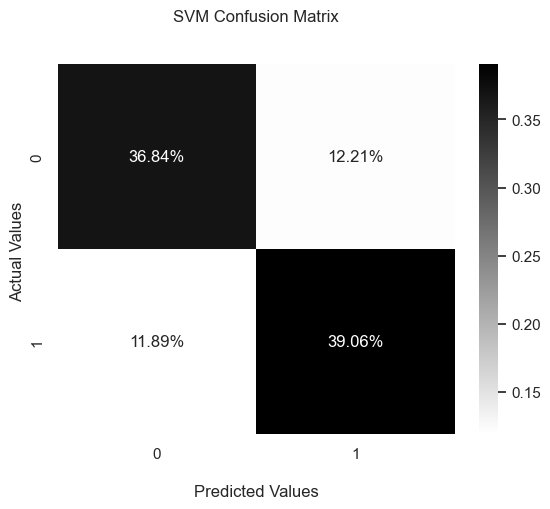

In [149]:
# implementing SVM
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

#plotting Confusion Matrix
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(cf_matrix_svm)

ax = sns.heatmap(cf_matrix_svm/np.sum(cf_matrix_svm), annot=True, fmt='.2%', cmap='binary')
ax.set_title('SVM Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [150]:
#evaluation of SVM: metrics pivot chart
print(classification_report(y_test, y_pred_svm))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_svm),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_svm),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_svm),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_svm),3)))
print('AUC Score : ' + str(round(metrics.roc_auc_score(y_test, y_pred_svm),3)))

              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75      1390
         1.0       0.76      0.77      0.76      1444

    accuracy                           0.76      2834
   macro avg       0.76      0.76      0.76      2834
weighted avg       0.76      0.76      0.76      2834

Accuracy Score : 0.759
Precision Score : 0.762
Recall Score : 0.767
F-Score : 0.764
AUC Score : 0.759


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

## Hyperparameter Tuning

c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Best Score:0.9349748161483443
Best Parameters: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
[[1228  162]
 [   4 1440]]


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

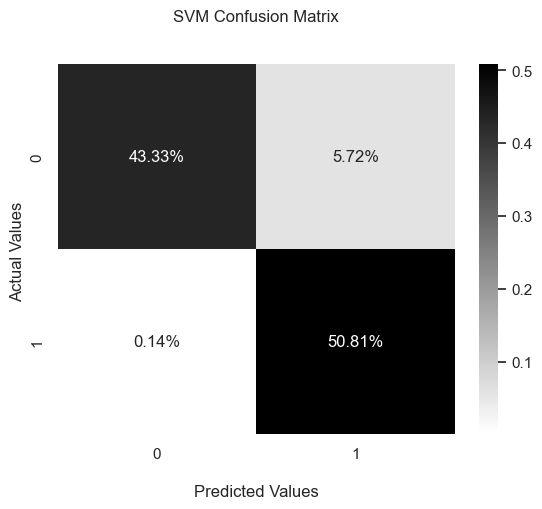

In [153]:
#hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
svm = SVC()
svm_cv = GridSearchCV(svm,param_grid,cv=5)
svm_cv.fit(X_train,y_train)

y_pred_svm_cv = svm_cv.predict(X_test)

print("Best Score:" + str(svm_cv.best_score_))
print("Best Parameters: " + str(svm_cv.best_params_))

cf_matrix_svm_cv = confusion_matrix(y_test, y_pred_svm_cv)
print(cf_matrix_svm_cv)

ax = sns.heatmap(cf_matrix_svm_cv/np.sum(cf_matrix_svm_cv), annot=True, fmt='.2%', cmap='binary')
ax.set_title('SVM Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [154]:
#evaluation of SVM: metrics pivot chart
print(classification_report(y_test, y_pred_svm_cv))

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred_svm_cv),3)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred_svm_cv),3)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred_svm_cv),3)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred_svm_cv),3)))
print('AUC Score : ' + str(round(metrics.roc_auc_score(y_test, y_pred_svm_cv),3)))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      1390
         1.0       0.90      1.00      0.95      1444

    accuracy                           0.94      2834
   macro avg       0.95      0.94      0.94      2834
weighted avg       0.95      0.94      0.94      2834

Accuracy Score : 0.941
Precision Score : 0.899
Recall Score : 0.997
F-Score : 0.946
AUC Score : 0.94


c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\darre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut